In [ ]:
# -*- coding: utf-8 -*-
"""
Created on 2023/04/11
Revised on 2023/05/30

@author: mjofre - Marc Jofre
e-mail: marc.jofre@upc.edu
Technical University of Catalonia - Universitat Politècnica de Catalunya (UPC)
"""
###########################################################################
# Seminar on Quantum Technologies for Cybersecurity: Networking and Systems
# Self-study
# Session 6 - Quantum Security: Networking and Systems

import os, sys, time
import numpy as np
import math
import matplotlib.pyplot as plt
from google.colab import files # This line can be commented when running in local computer
import matplotlib.style
import matplotlib as mpl
#print(plt.style.available)
mpl.style.use('default')

try:
  import qiskit
  import qiskit_aer
except:
  print("installing qiskit...")
  !pip install qiskit -U --quiet
  !pip install qiskit_aer -U --quiet
  print("installed qiskit.")
  import qiskit
  import qiskit_aer


installing qiskit...
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 29.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 84.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.5/241.5 kB 25.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 81.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 100.1 MB/s eta 0:00:0

# Self-study (5 hours):

Given the topic provided in-class in Session 4, search literature and information and prepare a presentation with the details given in class, which will be presented the last day of the seminar (3 hours).

Read on Quantum internet and protocols (1 hour):
 - https://www.youtube.com/watch?v=XzPi29O6DAc
 - https://www.quantum-network.com/
 - https://tu-delft.foleon.com/tu-delft/quantum-internet/the-six-stages-of-quantum-networks/
 - https://tu-delft.foleon.com/tu-delft/quantum-internet/classical-internet-vs-quantum-internet/
 - https://tu-delft.foleon.com/tu-delft/quantum-internet/the-basics-to-understand-quantum-internet/
 - https://tu-delft.foleon.com/tu-delft/quantum-internet/bringing-the-quantum-internet-to-life/
 - https://news.uchicago.edu/explainer/quantum-internet-explained


# Exercises on Quantum protocols and internet (1 hour)

Practise with the following experiments:
 - CHSH Bell inequality violation: https://lab.quantumflytrap.com/lab/bell-inequality?mode=waves


# Quantum Internet entangling capacity

Given the nodes:

The dataset "hero-network.csv" can be found in: https://zenodo.org/record/7933338
```
{'MEDUSA/MEDUSALITH AM',
    'ARCLIGHT/PHILLIPA SO',
    'WOLVERINE/LOGAN ',
    'SCARLET WITCH/WANDA ',
    'ARAGORN',
    'OVERMIND/GROM',
    'BATTLEAXE/',
    'ION/',
    'PINK PEARL/'}
```
Which node is the responsible for achivieng the maximum entanglement capacity of the hero-network? Explain why?

In [ ]:
import pandas as pd
import networkx as nx

try:
  # The dataset "hero-network.csv" can be found in: https://zenodo.org/record/7933338
  data = pd.read_csv('hero-network.csv')
except:
  uploaded = files.upload() # This line can be commented when running in local computer
  data = pd.read_csv('hero-network.csv')

TypeError: ignored

Entanglement capacity: 3.144631563329736


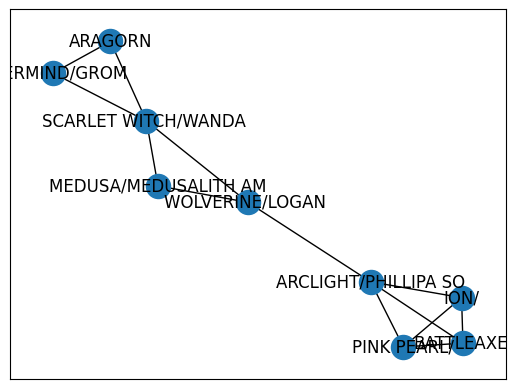

In [ ]:
heroes = {
    'MEDUSA/MEDUSALITH AM',
    'ARCLIGHT/PHILLIPA SO',
    'WOLVERINE/LOGAN ',
    'SCARLET WITCH/WANDA ',
    'ARAGORN',
    'OVERMIND/GROM',
    'BATTLEAXE/',
    'ION/',
    'PINK PEARL/'
}

relations = data[(data.hero1.isin(heroes)) & (data.hero2.isin(heroes))]
relations = pd.DataFrame(np.sort(relations.values, axis=1), columns=relations.columns).drop_duplicates(subset=['hero1', 'hero2'])

relations.head()
#CAPTION Load the data from the csv-file

graph = nx.from_pandas_edgelist(relations, source='hero1', target='hero2')
nx.draw_networkx(graph)
#CAPTION Representing the data as a graph

matrix = nx.to_pandas_adjacency(graph, dtype=int)
#CAPTION Representing the data as a matrix

L = nx.adjacency_matrix(graph).toarray()

# Compute the eigenvalues of the Laplacian matrix
eig_values = np.linalg.eigvals(L)

# Compute the entanglement capacity
ent_cap = np.max(np.abs(eig_values))

print("Entanglement capacity:", ent_cap)

# CHSH game
Exercise, use the different possible winning strategies to maximize and describe the results.

In [ ]:
#################################################################################
# Optimization of CHSH game
# https://github.com/qiskit-community/qiskit-community-tutorials/blob/master/awards/teach_me_qiskit_2018/chsh_game/CHSH%20game-tutorial.ipynb
# useful packages
import random as rand

# importing Qiskit
from qiskit import BasicAer
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute

from IPython.display import HTML

HTML('''<script>
code_show=true;
function code_toggle() {
 if (code_show){$('div.input').hide();} else {$('div.input').show();}code_show = !code_show} $( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

# Classical strategy
print('Classical strategies:\n 1: return the input bit.\n 2: return the opposite value of the input bit.\n 3: return 1.\n 4: return 0.')
def cplayer_output(strategy, inp):
  if(strategy == 1):
    return inp
  elif(strategy == 2):
    return abs(inp-1)
  elif(strategy == 3):
    return 1
  elif(strategy == 4):
    return 0
  else:
    print("INVALID choice")
    return 100

# Pick Alice's classical strategy
A_st = int(input('select the classical strategy for Alice, input 1, 2, 3 or 4 to pick one of the strategies listed above '))

# Pick Bob's classical strategy
B_st = int(input('select the classical strategy for Bob, input 1, 2, 3 or 4 to pick one of the strategies listed above '))

# fixes the numbers of games to be played
N=500

# initializes counters used to keep track of the numbers of games won and played by Alice an Bob
cont_win = 0 # counts games won
cont_tot = 0 # counts games played

# play the game N times
for i in range(N):
  # generates two random input from the refree, x and y, to be given to Alice and Bob
  random_num1 = rand.random() # first random number
  random_num2 = rand.random() # second random number

  if(random_num1 >= 1/2): # converts the first random number to 0 or 1
    x = 0
  else: x = 1

  if(random_num2 >= 1/2): # converts the second random number to 0 or 1
    y = 0
  else: y = 1

  # generates Alice's and Bob's output
  a = cplayer_output(A_st, x) # Alice's output
  b = cplayer_output(B_st, y) # Bob's output
  # check if the condition for winning the game is met
  if(x*y == a^b):
    cont_win += 1 # increase thes won games' counter if the condition to win the game is met
  cont_tot += 1 # increases the played games' counter

Prob_win = cont_win/cont_tot # winning probability
print(f'Alice and Bob won the game with probability: {Prob_win*100.0:.2f}%')

print('Quantum strategies:\n 1: measure at 0 rotation.\n 2: measure at a random angle rotation.\n 3: measure at chosen angle rotations.')

## Quantum strategy
# Alice's strategy
qA_st = int(input('select the quantum strategy for Alice, input 1, 2 or 3 to pick one of the strategies listed above: '))
if (qA_st==3):
  qAlice0rot = float(eval(input('select the measurement basis for Alice,s rotation angle (in rads; and you can use np.pi) when receiveing a 0: ')))
  qAlice1rot = float(eval(input('select the measurement basis for Alice,s rotation angle (in rads; and you can use np.pi) when receiveing a 1: ')))


# Bob's strategy
qB_st = int(input('select the quantum strategy for Bob, input 1, 2 or 3 to pick one of the strategies listed above: '))
if (qB_st==3):
  qBob0rot = float(eval(input('select the measurement basis for Bob,s rotation angle (in rads; and you can use np.pi) when receiveing a 0: ')))
  qBob1rot = float(eval(input('select the measurement basis for Bob,s rotation angle (in rads; and you can use np.pi) when receiveing a 1: ')))

def qAlice_output(strategy, inp):
  if(strategy == 1):
    return 0
  elif(strategy == 2):
    return rand.uniform(0,2*np.pi)
  elif(strategy == 3):
    if(inp == 0):
      return qAlice0rot
    elif(inp == 1):
      return qAlice1rot
  else:
    print("INVALID choice")
    return 100

def qBob_output(strategy, inp):
  if(strategy == 1):
    return 0
  elif(strategy == 2):
    return rand.uniform(0,2*np.pi)
  elif(strategy == 3):
    if(inp == 0):
      return qBob0rot
    elif(inp == 1):
      return qBob1rot
  else:
    print("INVALID choice")
    return 100

# set parameters of the quantum run of the game
shots = 1 # set how many times the circuit is run, accumulating statistics about the measurement outcomes
backend = BasicAer.get_backend('qasm_simulator') # set the machine where the quantum circuit is to be run

#fixes the numbers of games to be played
N=500

# initializes counters used to keep track of the numbers of games won and played by Alice an Bob
cont_win = 0 # counts games won
cont_tot = 0 # counts games played

#play N games
for i in range(N):
  # creates registers for qubits and bits
  # creates a quantum register, it specifies the qubits which are going to be used for the program
  q = QuantumRegister(2, name='q')
  # creates a classical register, the results of the measurement of the qubits are stored here
  c = ClassicalRegister(2, name='c')

  # creates quantum circuit, to write a quantum algorithm we will add gates to the circuit
  game = QuantumCircuit(q, c, name='game')

  # These gates prepare the entangled Bell pair to be shared by Alice and Bob as part of their quantum strategy
  # Alice will have qubit 0 and Bob will have qubit 1
  game.h(q[0]) # Hadamard gate on qubit 0
  game.cx(q[0],q[1]) # CNOT gate on qubit 1 controlled by qubit 0

  # generates two random input from the refree, x and y, to be given to Alice and Bob
  random_num1 = rand.random() # first random number
  random_num2 = rand.random() # second random number

  if(random_num1 >= 1/2): # converts the first random number to 0 or 1
    x = 0
  else: x = 1

  if(random_num2 >= 1/2): # converts the second random number to 0 or 1
    y = 0
  else: y = 1

  # The main part of Alice and Bob quantum strategy is to fix different rotation angles for their qubit according to the input x,y
  theta = qAlice_output(qA_st, x) # fixes Alice's rotation for her qubit
  phi = qBob_output(qB_st, y) # fixes Bob's rotation for his qubit

  # The following gates rotate Alice's qubit and Bob's qubit
  game.ry(theta,q[0]) #rotates Alice's qubit of an angle theta
  game.ry(phi,q[1]) #rotates Bob's qubit of an angle phi

  # These gates are used to measure  the value of the qubits
  game.measure(q[0], c[0]) # measure Alice's qubit and stores the result in a classical bit
  game.measure(q[1], c[1]) # measure Bob's qubit and stores the result in a classical bit

  # executes circuit and store the output of the measurements
  result = execute(game, backend=backend, shots=shots).result()

  data = result.get_counts('game') # extract the outcomes and their statistics from the result of the execution

  # reads the result of the measurements of the quantum system
  for outcomes in data.keys():
    out = outcomes

  # converts the result of the measurements contained in the classical register as string '00', '01', '10', '11',
  # which are the answers of Alice(a) and Bob (b), from a 'string' type  to 'integer' type
  if(out == '00'):
    a = 0
    b = 0
  if(out == '01'):
    a = 1
    b = 0
  if(out == '10'):
    a = 0
    b = 1
  if(out == '11'):
    a = 1
    b = 1

  # check if the condition for winning the game is met
  if(x*y == a^b):
    cont_win += 1 # increase thes won games' counter if the condition to win the game is met

  cont_tot += 1 # increases the played games' counter

qProb_win = cont_win/cont_tot

print(f'Alice and Bob won the game with probability: {qProb_win*100.0:.2f} %')

if Prob_win > qProb_win :
  print("The classical strategy gave Alice and Bob higher cha0nces of winning")
else:
  print("The quantum strategy gave Alice and Bob higher chances of winning")

Classical strategies:
 1: return the input bit.
 2: return the opposite value of the input bit.
 3: return 1.
 4: return 0.
select the classical strategy for Alice, input 1, 2, 3 or 4 to pick one of the strategies listed above 3
select the classical strategy for Bob, input 1, 2, 3 or 4 to pick one of the strategies listed above 3
Alice and Bob won the game with probability: 73.40%
Quantum strategies:
 1: measure at 0 rotation.
 2: measure at a random angle rotation.
 3: measure at chosen angle rotations.
select the quantum strategy for Alice, input 1, 2 or 3 to pick one of the strategies listed above: 3
select the measurement basis for Alice,s rotation angle (in rads; and you can use np.pi) when receiveing a 0: 0
select the measurement basis for Alice,s rotation angle (in rads; and you can use np.pi) when receiveing a 1: np.pi/2
select the quantum strategy for Bob, input 1, 2 or 3 to pick one of the strategies listed above: 3
select the measurement basis for Bob,s rotation angle (in ra

# Wrap-up of Probability errors and Fidelity

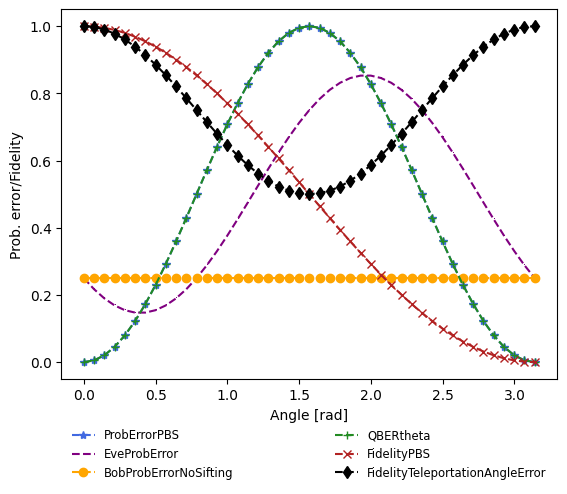

In [ ]:
##############################################################################
# Relation of Probability errors, QBER, Fidelities with the the rotation of the measurement basis \theta
NcalcAngle=45
MaxAngle=np.pi
AnglesScan=np.linspace(0,MaxAngle,NcalcAngle)

ProbErrorPBS=1.0-np.cos(AnglesScan)**2
EveProbError=0.25*((1.0-np.cos(2.0*AnglesScan))+(1.0-np.sin(2.0*AnglesScan))) # Error probability when Eve is randomly changing basis (it is minimized to 14.64% when theta=np.pi/8 - Breidbart basis)
BobProbErrorNoSifting=0.25*((1.0-np.cos(2.0*AnglesScan)**2)+(1.0-np.sin(2.0*AnglesScan)**2)) # Error probability when Bob is randomly changes basis (before key sifting)
QBERtheta=1.0-np.cos(AnglesScan)**2 # Error probability equivalent to Bob when doing sifting
FidelityPBS=1.0-np.sin(AnglesScan/2.0)**2# Angle is half, because at np.pi/2.0 its like at half place between the two states
FidelityTeleportationAngleError=1.0-ProbErrorPBS/2.0
# Fidelity towards a Bell state if usually as F=0.5*(1+cos(\theta)); depending on the Bell state of interest \theta has to be adjusted or even the cos can be replaced by a sin
# Fidelity cascaded devices F=Fi**N
# Fidelity in terms of coincidences F=RatioRc/(1.0+RatioRc), where RatioRc is the ratio of coincidences between RcParallel/RcOrthogonal (Rc coincidence rate)

plt.figure()
line1,=plt.plot(AnglesScan,ProbErrorPBS,'royalblue',linestyle='dashed',marker='*')
line2,=plt.plot(AnglesScan,EveProbError,'purple',linestyle='dashed',marker=',')
line3,=plt.plot(AnglesScan,BobProbErrorNoSifting,'orange',linestyle='dashed',marker='o')
line4,=plt.plot(AnglesScan,QBERtheta,'forestgreen',linestyle='dashed',marker='+')
line5,=plt.plot(AnglesScan,FidelityPBS,'firebrick',linestyle='dashed',marker='x')
line6,=plt.plot(AnglesScan,FidelityTeleportationAngleError,'black',linestyle='dashed',marker='d')
plt.legend((line1, line2, line3, line4, line5, line6), ('ProbErrorPBS','EveProbError','BobProbErrorNoSifting','QBERtheta','FidelityPBS','FidelityTeleportationAngleError'),bbox_to_anchor=(0, -0.3, 1, 0), loc="lower left", mode="expand", ncol=2,shadow = False, fancybox = False, frameon = False, fontsize='small')# 'best'
plt.xlabel('Angle [rad]',color='k')
plt.ylabel('Prob. error/Fidelity',color='k')
plt.show()

####################################################
# Relevant transmittivity/loss related equations:
# Rr=eta Rs # where eta is the transmissivity as eta \leq 1 and proportional to np.exp(-att Distance), where att is the attenuation att\geq 0.
# dBatt=dBLoss/Km*L(Km)
# dBatt=-10 log10(eta)
# ProbabilityPhotonLoss=1-eta=1-np.exp(-Distance/L0), where dBLoss/Km * L0=-10 log10(1/e)

####################################################
# Relevant trigonometric relations
# cos(theta)**2+sin(theta)**2=1
# sin(theta)**2=0.5*(1-cos(2theta))
# cos(theta)**2=0.5*(1+cos(2theta))